<a href="https://colab.research.google.com/github/kkamal11/MLT/blob/main/Week_9_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-9

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.


## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. 

**Do not edit this cell.**

In [77]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0, class_sep = 3, random_state=20)

## Problem 1
How many samples are there in the dataset?



In [78]:
print(X.shape[0])

50


## Problem 2

How many features are there in the dataset?


In [10]:
print(X.shape[1])

2


## Problem 3
In the target vector $y$, replace all occurrences of 0 with -1. 

How many unique classes are there in the target vector?



In [23]:
print(np.unique(y))

[0 1]


In [24]:
y == 0

array([False, False, False, False, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False,  True,  True, False,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True])

In [79]:
# y = np.array([i if i == 1 else -1 for i in y])
y[y == 0] = -1
y

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1])

## Problem 4
Plot the data keepig first feature on the x-axis and the second feature on the y-axis. Plot the data points belonging to each class in different colors. Does the data seem linearly separable?

[MCQ]

**Options:**

(a) Yes

(b) No



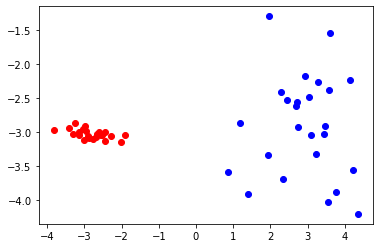

In [80]:
# plt.plot(X[:,0],X[:,1],'ro')
plt.plot(X[:,0][y == -1],X[:,1][y == -1],'ro')
plt.plot(X[:,0][y == 1],X[:,1][y == 1],'bo')
plt.show()

## Problem 5

Initialize w to be a zero vector, with shape equal to the number of features in the data.

Iterate over each data point $x$ in $X$ one by one (in the same sequence as present in $X$). For each data point, compute the value of $w^Tx$. If $w^Tx \ge 0$, predict positive class for $x$, else predict the negative class.

If prediction does not match the actual class label, update the weight vector as per the following update rule:
$$w_{new} = w_{old} + xy$$ where $x$ is the data point and $y$ is the actual label of $x$.

Run the above for 10 epochs (iterations), but stop if there are no weight updates in an epoch. 

In which iteration, does the number of weight updates becomes zero for the first time?

[NAT]
**Options**

(a) 1

(b) 2

(c) 3

(d) 5



In [34]:
def prediction(l):
    return 1 if l >= 0 else -1

In [50]:
n_feat = X.shape[1]
w = np.zeros(n_feat)

weight_updates_in_each_epoch = {}

for epoch in range(10):
    weight_updates_in_each_epoch[epoch] = 0
    for i in range(len(X)):
        wtx = w.T @ X[i]
        y_pred = prediction(wtx) 
        # print(y[i],y_pred)
        if y_pred != y[i]:
            w = w + X[i]*y[i]
            weight_updates_in_each_epoch[epoch] += 1
    if weight_updates_in_each_epoch[epoch] == 0:
        print(epoch)
        break
    

print(weight_updates_in_each_epoch)

1
{0: 2, 1: 0}


In [51]:
print(w)

[ 6.08372134 -0.97979197]


## Problem 6
Plot the vector w and the decision boundary thus obtained.



- The decision boundary will be perpendicular to w.

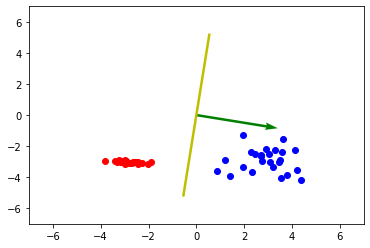

In [60]:
plt.plot(X[:,0][y == -1],X[:,1][y == -1],'ro')
plt.plot(X[:,0][y == 1],X[:,1][y == 1],'bo')
plt.quiver(0, 0, w[0], w[1],scale=25, color="g")
plt.quiver(0, 0, -w[1], w[0],scale=25, color="y", headaxislength=0, headlength=0)
plt.quiver(0, 0, w[1], -w[0],scale=25, color="y", headaxislength=0, headlength=0)
# plt.show()
plt.xlim(-7,7)
plt.ylim(-7,7);

## Problem 7
What is the value of loss using the weight vector obtained earlier?  


In [67]:
def loss(X, w, y):
    ans = 0
    for i in range(len(X)):
        wtx = w.T @ X[i]
        y_pred = prediction(wtx)
        if y_pred != y[i]:
            ans += 1
    return ans/len(X)

loss(X,w,y)

0.0

## Problem 8
Now use the following data set, replace occurrences of 0 with -1 and visualize.

**Do not edit the following cell.**



In [81]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0.1, class_sep = 2, random_state=20)

In [69]:
print(X.shape)

(50, 2)


## Problem 9

Apply the Perceptron code again. 

What is the number of weight updates performed in epoch 10?



In [82]:
y[y == 0] = -1

In [83]:
w = np.zeros(X.shape[1])

In [84]:
update_in_each_epoch = {}

for epoch in range(10):
    update_in_each_epoch[epoch] = 0
    for i in range(len(X)):
        wtx = w.T @ X[i]
        y_pred = prediction(wtx)
        if y_pred != y[i]:
            w = w + X[i]*y[i]
            update_in_each_epoch[epoch] += 1

print(update_in_each_epoch)


{0: 13, 1: 11, 2: 12, 3: 11, 4: 11, 5: 10, 6: 11, 7: 11, 8: 11, 9: 11}


## Problem 10
Visualize the weight vector and the decision boundary.



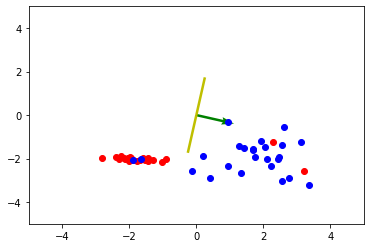

In [85]:
plt.plot(X[:,0][y == -1],X[:,1][y == -1],'ro')
plt.plot(X[:,0][y == 1],X[:,1][y == 1],'bo')
plt.quiver(0, 0, w[0], w[1],scale=25, color="g")
plt.quiver(0, 0, -w[1], w[0],scale=25, color="y", headaxislength=0, headlength=0)
plt.quiver(0, 0, w[1], -w[0],scale=25, color="y", headaxislength=0, headlength=0)
# plt.show()
plt.xlim(-5,5)
plt.ylim(-5,5);

## Problem 11
What is the value of loss using the weight vector obtained in the 10th epoch?



In [87]:
loss(X,w,y)*len(X)

4.0